<a href="https://colab.research.google.com/github/Rick279a/Inteligencia_Artificial_Il/blob/main/gans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O código implementa uma GAN, com um gerador que cria dados falsos e um discriminador que tenta distinguir entre dados reais e falsos.**

**O gerador é treinado para enganar o discriminador, enquanto o discriminador é treinado para melhorar sua capacidade de distinguir entre dados reais e falsos.**

In [ ]:
# Manipulação de arrays e operações matemáticas
import numpy as np
#Construção e treinamento de redes neurais
import tensorflow as tf
# Importa camadas e o modelo Sequential do Keras
from tensorflow.keras import layers, Sequential

# Função para construir o gerador, que cria dados falsos
def build_generator():
    model = Sequential([
        layers.Dense(16, activation='relu', input_dim=1),
        layers.Dense(1)
    ])
    return model

# Função para construir o discriminador, que tenta distinguir entre dados reais e falsos
def build_discriminator():
    model = Sequential([
        layers.Dense(16, activation='relu', input_dim=1),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Criando o modelo gerador e discriminador
generator = build_generator()  # Gerador de dados falsos
discriminator = build_discriminator()  # Discriminador que avalia se os dados são reais ou falsos
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Conectando o gerador ao discriminador
discriminator.trainable = False  # Desativando o treinamento do discriminador na rede GAN (será treinado separadamente)
gan = Sequential([generator, discriminator])  # Definindo a GAN (gerador + discriminador)
gan.compile(optimizer='adam', loss='binary_crossentropy')  # Compilando a GAN com otimizador Adam e perda binária

# Dados reais para treinar o discriminador
real_data = np.array([[6.0], [7.0], [8.0]])
labels_real = np.ones((3, 1))
labels_fake = np.zeros((3, 1))

# Configuração de épocas e tamanho do lote
epochs = 10  # Quantas vezes o treinamento será repetido
batch_size = 3

# Loop de treinamento
for epoch in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, 1))
    generated_data = generator.predict(noise)

    # Treinando o discriminador com dados reais e falsos
    d_loss_real = discriminator.train_on_batch(real_data, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)

    # Treinando o gerador para enganar o discriminador (a GAN tenta enganar o discriminador)
    noise = np.random.normal(0, 1, (batch_size, 1))  # Gerando novo ruído para o treinamento da GAN
    gan_loss = gan.train_on_batch(noise, labels_real)  # Treinando o gerador (via GAN) para que seus dados sejam classificados como reais

    # Exibindo as perdas de treinamento a cada 10 épocas
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss D Real: {d_loss_real}, Loss D Fake: {d_loss_fake}, Loss G: {gan_loss}")

# Gerando novos números a partir do gerador
noise = np.random.normal(0, 1, (5, 1))
generated_numbers = generator.predict(noise)
print("Números gerados:", generated_numbers)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 0, Loss D Real: 5.033206462860107, Loss D Fake: 2.86944842338562, Loss G: [array(2.8694484, dtype=float32), array(2.8694484, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Números gerados: [[-0.2857833 ]
 [-0.11666043]
 [-0.00900599]
 [-0.01204219]
 [-0.06552185]]


**O código implementa um GAN para gerar imagens de dígitos manuscritos a partir do conjunto de dados MNIST.**

**O gerador cria imagens a partir de um vetor de ruído, enquanto o discriminador classifica se as imagens são reais ou falsas.**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
Epoch 0, D Loss Real: 1.1816930770874023, D Loss Fake: 0.914802074432373, G Loss: [array(0.9148021, dtype=float32), array(0.9148021, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


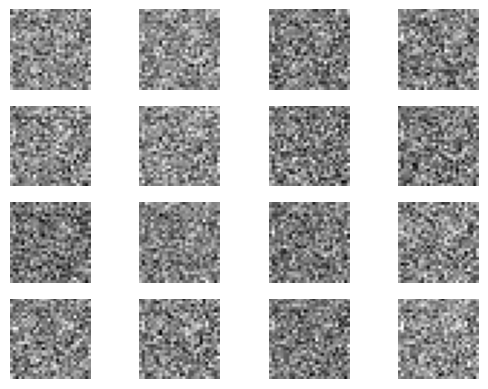

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━

In [ ]:
# Manipulação de arrays e operações matemáticas
import numpy as np
# Visualização de dados e resultados
import matplotlib.pyplot as plt
#Construção e treinamento de redes neurais
import tensorflow as tf
# Importa camadas e o modelo Sequential do Keras
from tensorflow.keras import layers, Sequential
# Importa o conjunto de dados MNIST do Keras
from tensorflow.keras.datasets import mnist

# Carregar o conjunto de dados MNIST
(x_train, _), (_, _) = mnist.load_data()
x_train = (x_train - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

# Parâmetros principais do modelo
batch_size = 64  # Tamanho do lote de treinamento
epochs = 100  # Quantas vezes o ciclo de treinamento será repetido
latent_dim = 100  # Tamanho do vetor de ruído

# Construir o Gerador (cria imagens falsas a partir de ruído)
def build_generator():
    model = Sequential([
        layers.Dense(256, activation='relu', input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(28 * 28 * 1, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Construir o Discriminador (classifica se as imagens são reais ou falsas)
def build_discriminator():
    model = Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Construir a GAN que conecta o Gerador ao Discriminador
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    return model

# Instanciar o Gerador e o Discriminador
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Instanciar e compilar a GAN
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Loop de treinamento da GAN
for epoch in range(epochs):
    # Treinar o Discriminador com imagens reais
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]
    real_labels = np.ones((batch_size, 1))

    # Gerar imagens falsas para treinar o discriminador
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise)
    fake_labels = np.zeros((batch_size, 1))

    # Treinar o discriminador com imagens reais e falsas
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)  # Treinar com imagens reais
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)  # Treinar com imagens falsas

    # Treinar o Gerador para enganar o Discriminador (treinamento da GAN)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Exibir perdas de treinamento a cada 1000 épocas
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}")

        # Gerar e visualizar imagens
        noise = np.random.normal(0, 1, (16, latent_dim))
        generated_images = generator.predict(noise)
        generated_images = (generated_images + 1) / 2.0

        # Visualizar as imagens geradas
        fig, axs = plt.subplots(4, 4)
        cnt = 0
        for i in range(4):
            for j in range(4):
                axs[i, j].axis('off')
                axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
                cnt += 1
        plt.show()  # Mostrar o gráfico com as imagens geradas
